# FACE DETECTION

In [4]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt

image = cv2.imread("image.png")

First, let's load the pre-trained classifiers:

In [5]:
face_detection = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_detection = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

print("Face Detection models loaded :)") 

Face Detection models loaded :)


- Convert to grayscale → makes detection easier and faster.
- Detect faces → uses face_cascade.detectMultiScale() to find faces in the grayscale image.
- Copy image → so we can draw rectangles without changing the original.
- Draw rectangles around faces → blue boxes for each detected face.
- Detect eyes inside each face → green boxes for eyes within the face region.
- Convert to RGB → for correct color display in matplotlib.
- Show image → displays the result with the number of faces found.

👤 Found 1 face(s) in your image!
[[232 213  50  50]]


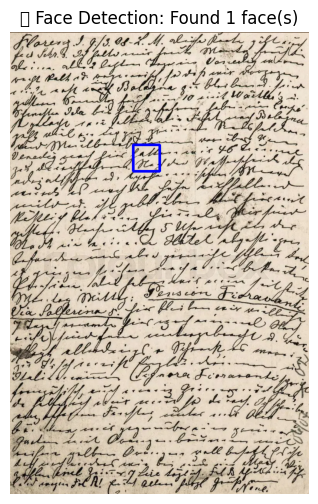

In [6]:
# Convert to grayscale for detection
gray = cv2.cvtColor(image , cv2.COLOR_BGR2GRAY)

# Detecate the Face 
faces = face_detection.detectMultiScale(gray , 1.1 , 4)

# Create the copy 
copy_image = image.copy()

print(f"👤 Found {len(faces)} face(s) in your image!")
print(faces)

# Draw rectangles around faces
for (x, y, w, h) in faces:
    cv2.rectangle(copy_image, (x, y), (x+w, y+h), (255, 0, 0), 3)
    # Detect eyes within each face
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = copy_image[y:y+h, x:x+w]
    eyes = eye_detection.detectMultiScale(roi_gray)
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 2)
        
result_rgb = cv2.cvtColor(copy_image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 6))
plt.imshow(result_rgb)
plt.title(f'👤 Face Detection: Found {len(faces)} face(s)')
plt.axis('off')
plt.show()